![my image caption](11.jpeg)

   ## Introduction
As a data analyst, we are going to analyze a website for the sale of yachts and boats. The marketing team prepares a weekly newsletter for boat owners. Newsletter designed
to help sellers get more views for their boat as well as stay up to date with market trends.
The head of marketing has set an ambitious goal of increasing readership by 75% this year.

The marketing team would like you to review the latest data and help them learn more about the following points:
### 1. Do the most expensive boats get the most views?
### 2. Are there commonalities among the most viewed boats?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("https://s3.amazonaws.com/talent-assets.datacamp.com/boat_data.csv") 
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


In [3]:
df.columns = df.columns.map(lambda x: x.lower().replace(" ", "_"))


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        9888 non-null   object 
 1   boat_type                    9888 non-null   object 
 2   manufacturer                 8550 non-null   object 
 3   type                         9882 non-null   object 
 4   year_built                   9888 non-null   int64  
 5   length                       9879 non-null   float64
 6   width                        9832 non-null   float64
 7   material                     8139 non-null   object 
 8   location                     9852 non-null   object 
 9   number_of_views_last_7_days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [5]:
df['currency'] =df.price.apply(lambda x: x.split()[0])
df['price'] =df.price.apply(lambda x: x.split()[1]).astype(int)


In [6]:
df.currency.unique()


array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

## Exchange rate

EUR = CHF * 1,03

EUR = DKK * 0,13445

EUR = Â£ * 1,17

In [7]:
df['price'] = np.where(df.currency.str.contains('CHF'), df.price.mul(1.03), df.price).round(0)
df['price'] = np.where(df.currency.str.contains('DKK'), df.price.mul(.13445), df.price).round(0)
df['price'] = np.where(df.currency.str.contains('Â£'), df.price.mul(1.17), df.price).round(0)

df = df.rename(columns= {'price':'price_eur'}).drop('currency',axis =1)


In [8]:
df.head()

,price_eur,boat_type,manufacturer,type,year_built,length,width,material,location,number_of_views_last_7_days
0,3437.0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,3490.0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,3883.0,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,3482.0,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,3399.0,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


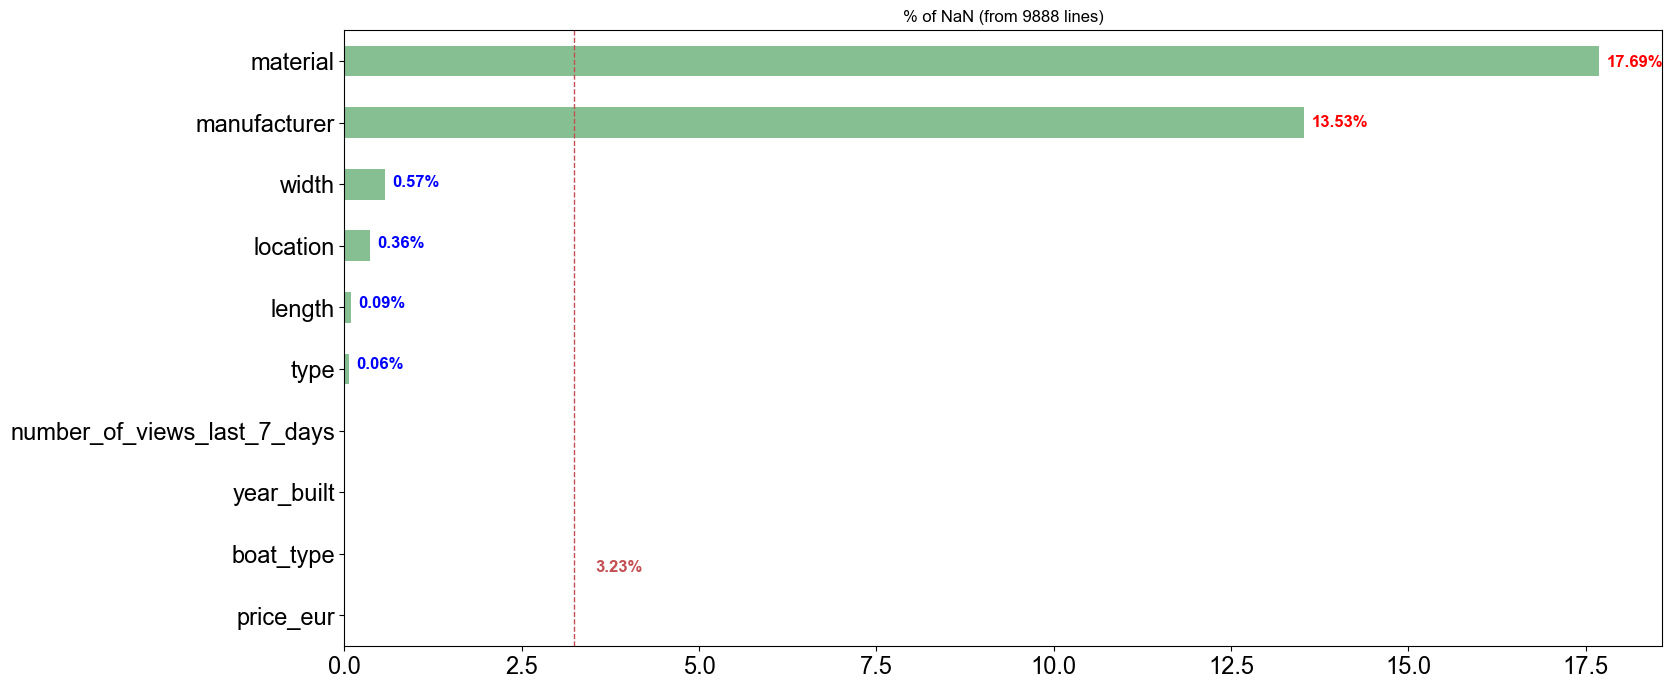

In [9]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (from {} lines)'.format(len(df)), 
                               color='#86bf91', legend=False, fontsize=17)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, .10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    return ax, threshold

plot, threshold = percent_hbar(df)
sns.set()

In [10]:
df.dropna(subset = ['width','location','type','length' ],inplace = True)
df.manufacturer.fillna('unknown',inplace = True)
df.material.fillna('unknown',inplace = True)


In [11]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
variables.set_index('Variable', inplace=True)    
variables

,Number of unique values,Values
Variable,,
price_eur,3153,"[3437.0, 3490.0, 3883.0, 3482.0, 3399.0, 3760...."
boat_type,126,"[Motor Yacht, Center console boat, Sport Boat,..."
manufacturer,908,"[Rigiflex power boats, Terhi power boats, Mari..."
type,24,"[new boat from stock, Used boat,Unleaded, Used..."
year_built,121,"[2017, 2020, 0, 2019, 1999, 2018, 1987, 2004, ..."
length,1601,"[4.0, 3.69, 3.0, 3.55, 4.03, 6.2, 3.64, 4.35, ..."
width,571,"[1.9, 1.5, 1.42, 1.0, 1.46, 1.56, 2.38, 1.37, ..."
material,12,"[unknown, Thermoplastic, Aluminium, GRP, PVC, ..."
location,112,"[Switzerland, Germany, Denmark, Italy, France,..."


In [12]:
df.describe()

,price_eur,year_built,length,width,number_of_views_last_7_days
count,9.790000e+03,9790.000000,9790.000000,9790.000000,9790.000000
mean,3.010819e+05,1892.499387,11.537413,3.514004,149.366803
std,9.719415e+05,461.575903,5.970952,1.213858,152.243472
min,3.300000e+03,0.000000,1.040000,0.010000,13.000000
25%,4.300000e+04,1996.000000,7.460000,2.540000,70.000000
50%,9.238100e+04,2007.000000,10.245000,3.320000,108.000000
75%,2.450000e+05,2017.000000,13.900000,4.250000,172.000000
max,3.100000e+07,2021.000000,100.000000,25.160000,3263.000000


Since the year of construction cannot be equal to 0, I suggest that further consideration of the data be carried out without these values. Such data is about 5% of the total. If we don't like our results, then we can reconsider our decision and try to find another one in this case.

In [13]:

df = df[df['year_built']!=0]


Let's answer the first question

## Is it the most expensive boats that get the most views?


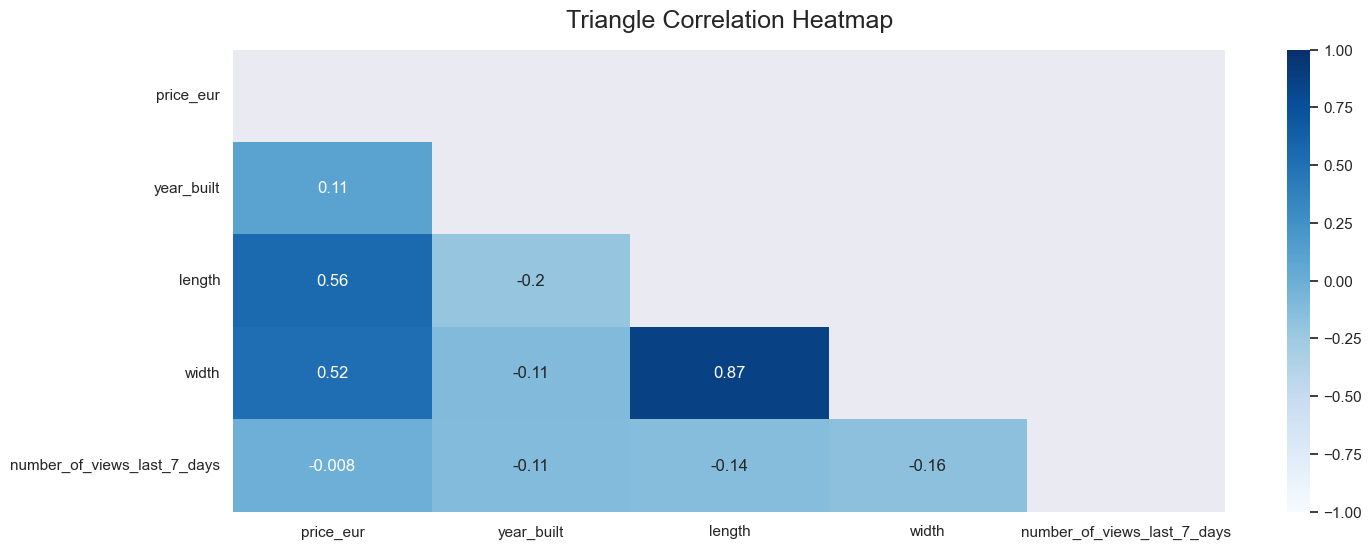

In [14]:


plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

As we can see from the correlation there is no strong direct relationship. Let's take a closer look at this data.

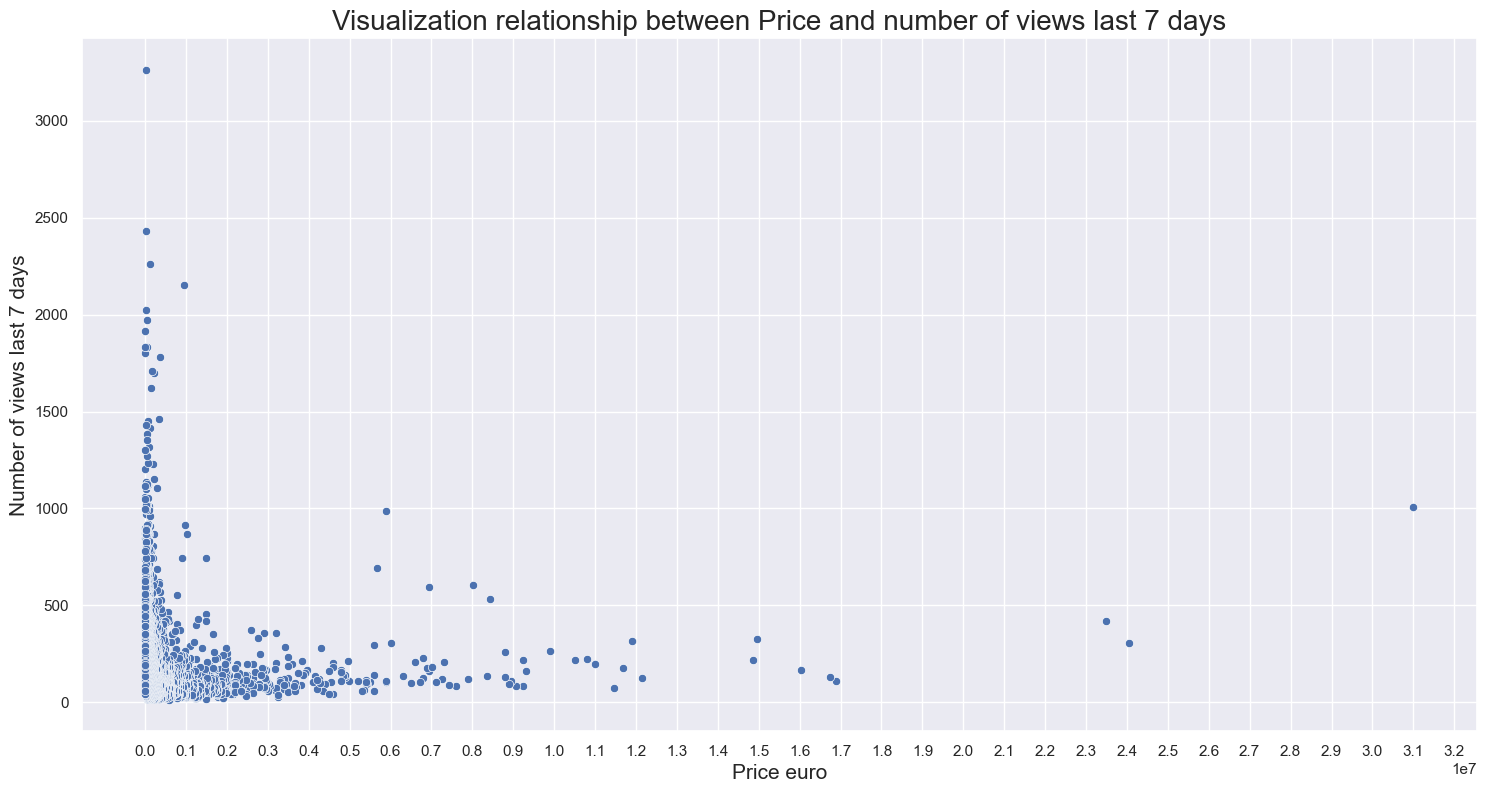

In [15]:
plt.figure(figsize = [18,9])
plt.title("Visualization relationship between Price and number of views last 7 days", fontsize = 20)
plt.xlabel("Price euro", fontsize = 15)
plt.ylabel("Number of views last 7 days", fontsize = 15)
sns.scatterplot(data = df, y = 'number_of_views_last_7_days', x = 'price_eur')
plt.xticks(np.linspace(-0, 32000000, 33))

plt.show()


The graph shows that the most expensive boats do not gain a large number of views

Intuitively , this is understandable because the price for them is very high , designed for the premium segment and this is a piece product .

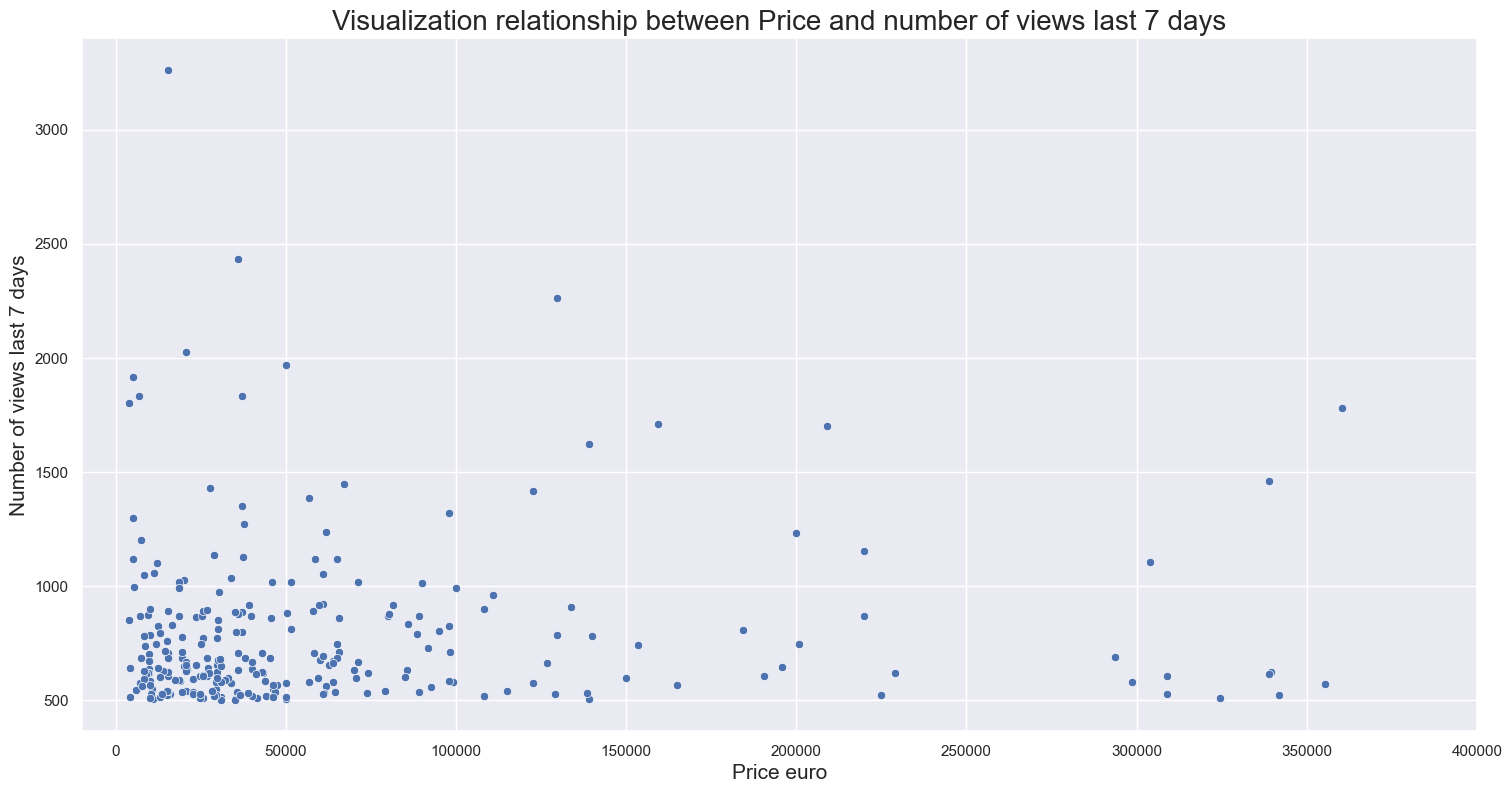

In [16]:

views_500 = df.query('number_of_views_last_7_days >=500')

plt.figure(figsize = [18,9])
plt.title("Visualization relationship between Price and number of views last 7 days", fontsize = 20)
plt.xlabel("Price euro", fontsize = 15)
plt.ylabel("Number of views last 7 days", fontsize = 15)
sns.scatterplot(data = views_500, y = 'number_of_views_last_7_days', x = 'price_eur')
plt.xlim(-10000,400000)

plt.show()


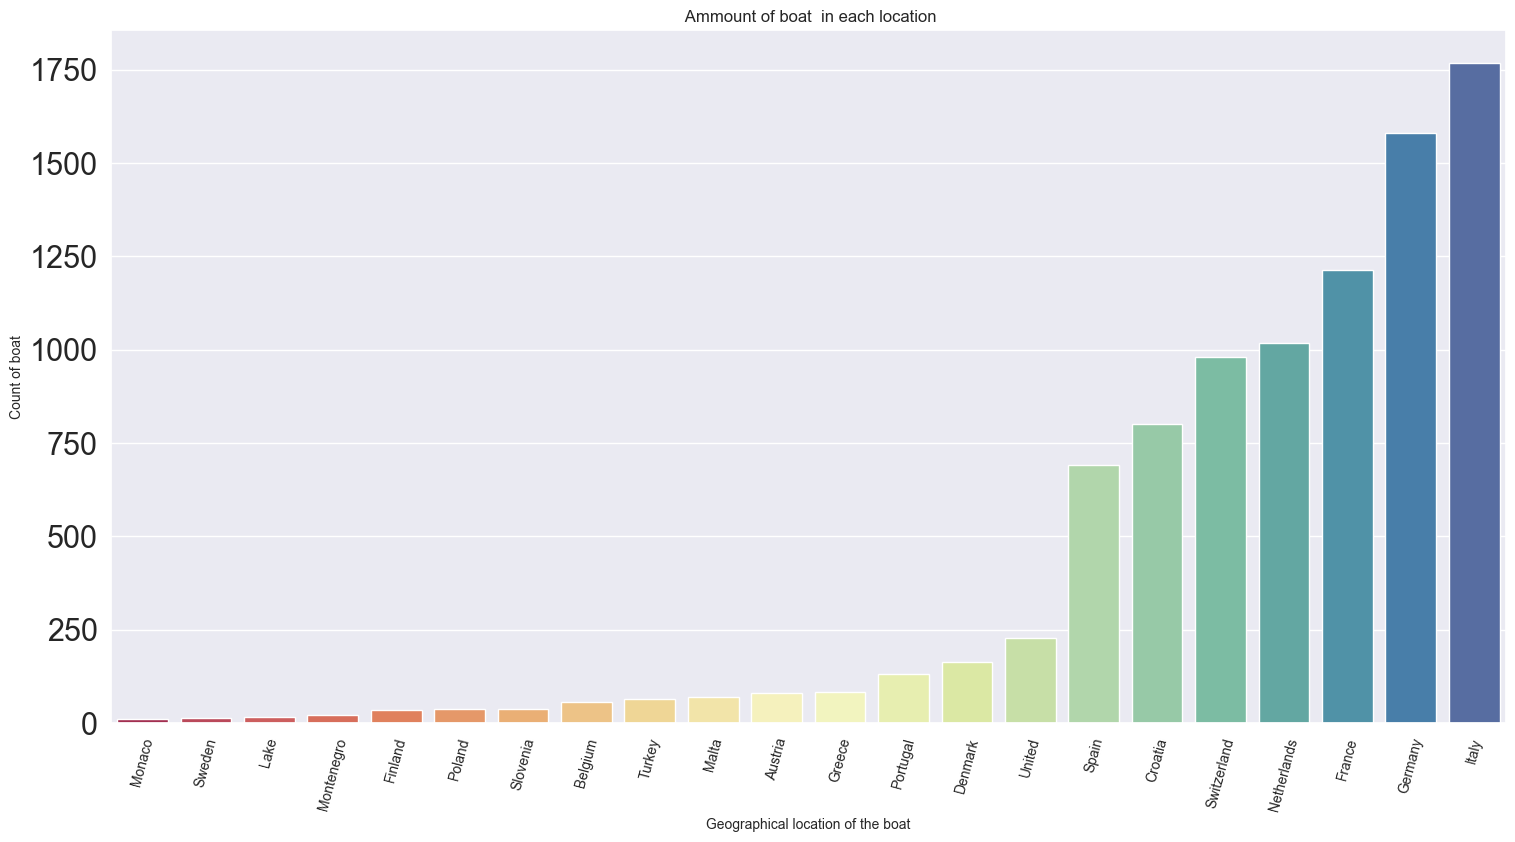

In [17]:
location = df.groupby(['location']).count().sort_values('price_eur').reset_index().rename(columns = {'price_eur': 'count'})
locat_10_count =location[location['count']>=10][['location','count']]
plt.figure(0, figsize=(18, 9));
sns.set(font_scale = 2); 
sns.barplot(x='location',y= 'count',  data=locat_10_count, palette='Spectral'); 
plt.xticks(rotation=75, fontsize=10); 
plt.title(' Ammount of boat  in each location', fontsize=12);
plt.xlabel('Geographical location of the boat', fontsize=10);
plt.ylabel('Count of boat', fontsize=10);
plt.show()


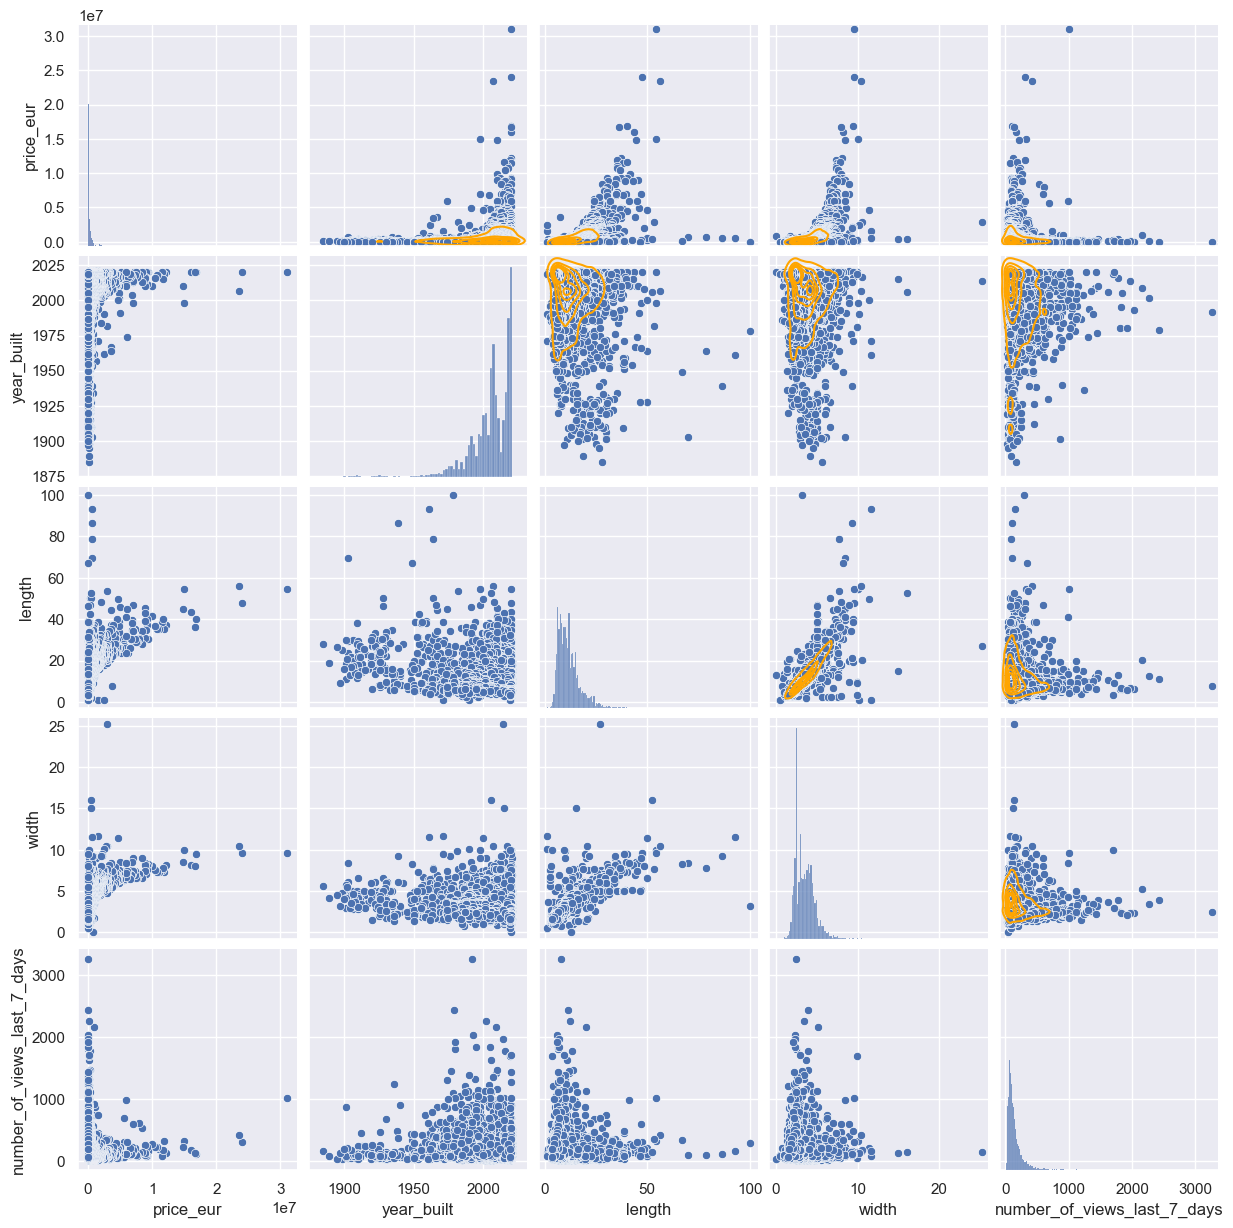

In [18]:
sns.set()
g = sns.pairplot(df)
g.map_upper(sns.kdeplot, n_levels=6, color='orange')
plt.show()

If we look at the graph above, we can see that the shorter the length of the boat, the more views it received (if it is small, it received fewer views), which is quite intuitive, since smaller boats tend to be cheaper. Same story with width (because they are positively correlated).

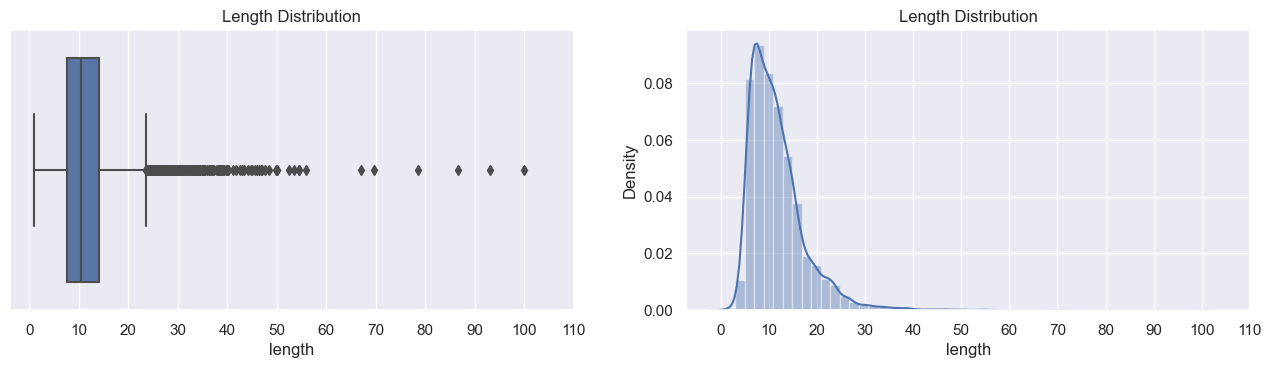

In [19]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(223)
sns.boxplot(df.length)
plt.xticks(np.linspace(-0, 110, 12))
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df.length)
plt.xticks(np.linspace(-0, 110, 12))
ax2.set_title("Length Distribution");


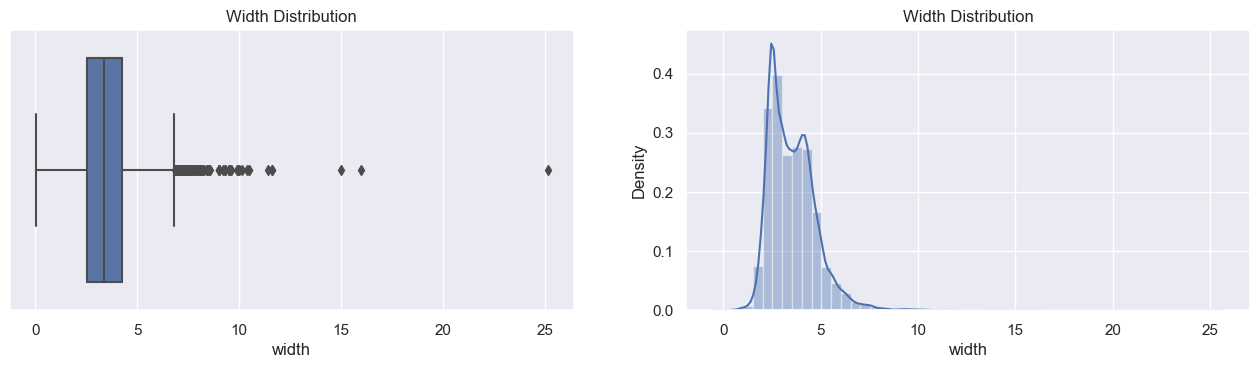

In [20]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(223)
sns.boxplot(df.width)
ax1.set_title("Width Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df.width)
ax2.set_title("Width Distribution");


The 25th percentile of price is EUR€43K, the medium is EUR€92K, 75th percentile is EUR€245K. We divide the prices into five groups: Under 45K, Cheap(€45K-100K), Average(€100K-270K), Expensive(€270K-400K), Very Expensive(€400K+).

In [21]:

price_category = pd.cut(df['price_eur'],bins=[0,45001,100001,270001,400001,32000000],labels=['under 45K','cheap','average','expensive', 'very expensive'])
df.insert(1,'eur_price_group',price_category)

In [22]:

df['boat_type'] = df['boat_type'].str.split(",",expand=True)[0]
type_ = df['type'].str.split(",",expand=True)
df['type'] = type_[0]
df.insert(5,'fuel',type_[1])
age = 2022 - df['year_built']
df.insert(7,'age',age)

In [23]:
df.describe()

,price_eur,year_built,age,length,width,number_of_views_last_7_days
count,9.241000e+03,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000
mean,3.024187e+05,2004.931176,17.068824,11.717052,3.552552,150.446813
std,9.399768e+05,16.387410,16.387410,5.997217,1.211919,155.106784
min,3.300000e+03,1885.000000,1.000000,1.040000,0.010000,13.000000
25%,4.490000e+04,1999.000000,4.000000,7.560000,2.550000,70.000000
50%,9.500000e+04,2008.000000,14.000000,10.500000,3.390000,108.000000
75%,2.499000e+05,2018.000000,23.000000,14.000000,4.260000,172.000000
max,3.100000e+07,2021.000000,137.000000,100.000000,25.160000,3263.000000


The 25th percentile of age is 4 years, the medium is 14 years, 75th percentile is 23 years. We divide the prices into six groups: 0–5 years, 6–15 years, 16–25 years, 26–50 years, 51–100 years, 101+ years.



In [24]:
age_category = pd.cut(df.age,bins=[0,5,15,25,51,101,138],labels=['0-5 years', '6-15 years','16-25 years', '26-50 years', '51-100 years', '101+ years'])
df.insert(8,'age_group',age_category)

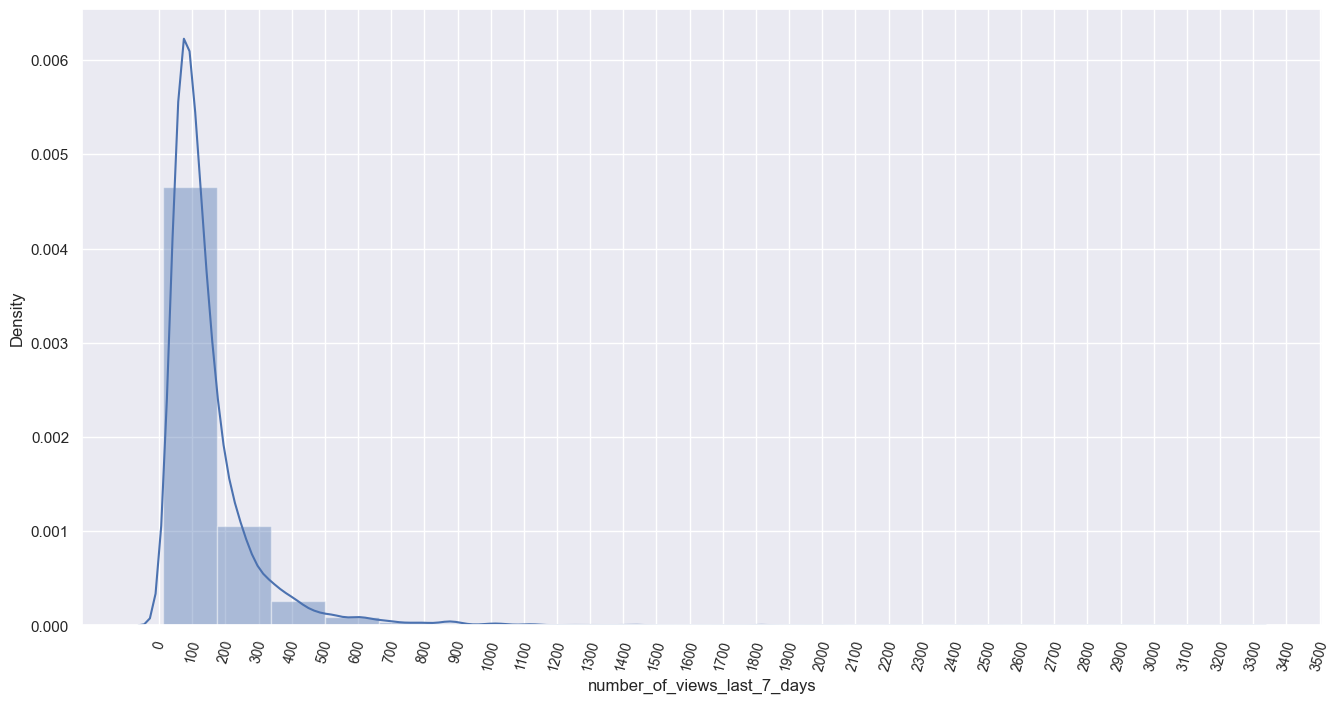

In [25]:
plt.figure(figsize=(16,8))

sns.distplot(df['number_of_views_last_7_days'], bins=20);
plt.xticks(np.linspace(-0, 3500, 36))
plt.xticks(rotation=75, fontsize=10); 


plt.show();


## You can see that the average boat’s page view is around 100–200.

The 25th percentile of views of ads for the sale of boats is 70, the average is 108, the 75th percentile is 172 and the maximum is 3263. Let's divide the views into five groups:

### low - from 13 to 70

### average - from 71 to 105

### above average from 106 to 170

### good from 171 to 1000

### high more than 1001



In [26]:
v_category = pd.cut(df['number_of_views_last_7_days'],bins=[0,71,106,171,1001,3263],labels=['low', 'average','above average', 'good', 'high'])
df.insert(14,'view_group',v_category)

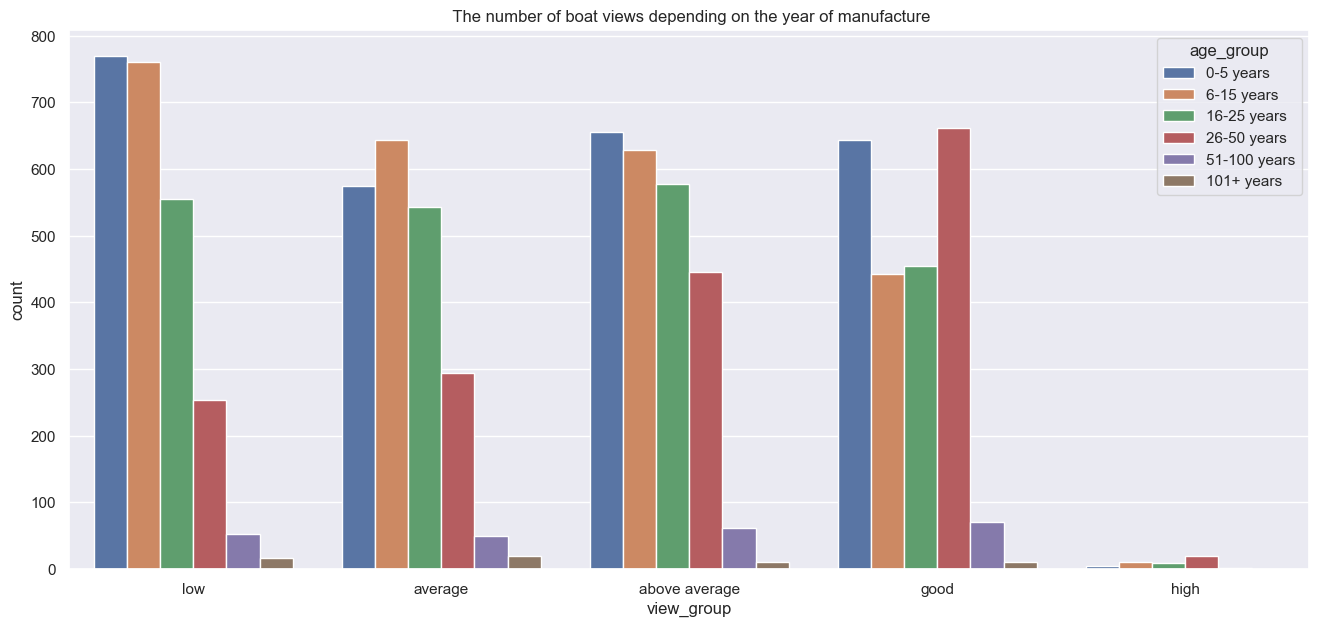

In [27]:
plt.figure(figsize=(16,7))
plt.title(' The number of boat views depending on the year of manufacture', fontsize=12);

sns.countplot(data = df, x = 'view_group',hue = 'age_group');


Used boats are more popular, boats up to 5 years old are in the first place, and from 6 to 16 years old are in the second.

In [28]:
most_popular_boat = list(df.groupby(['boat_type']).count().sort_values('price_eur',ascending = False).index[:8])


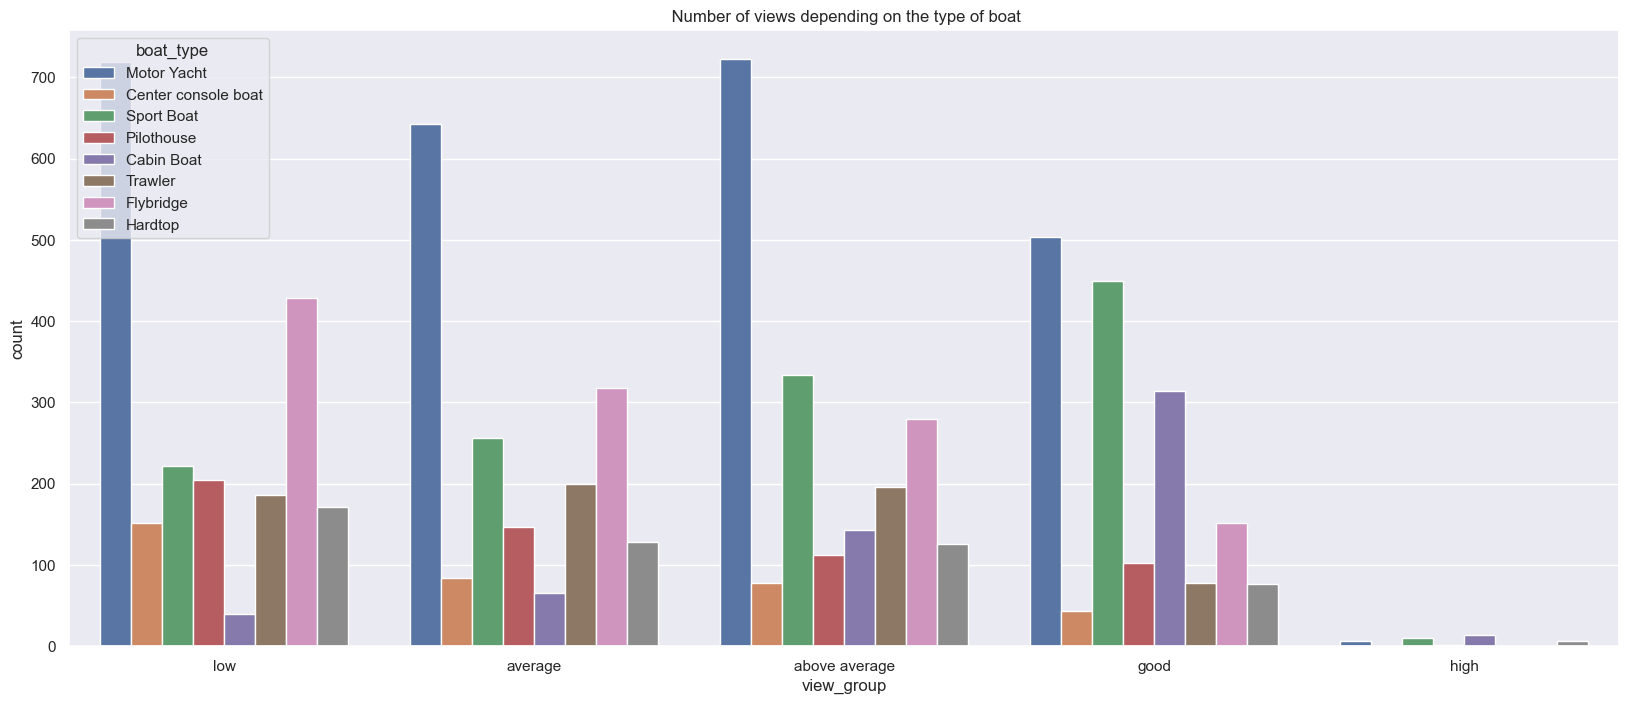

In [29]:
plt.figure(figsize=(20,8))
plt.title(' Number of views depending on the type of boat', fontsize=12);

sns.countplot(data = df[df['boat_type'].isin(most_popular_boat)], x = 'view_group',hue = 'boat_type');

Buyers are more often looking for a motor yacht or a sports boat. A motor yacht is usually designed for family and friends; a sports boat is designed for people who love water sports.

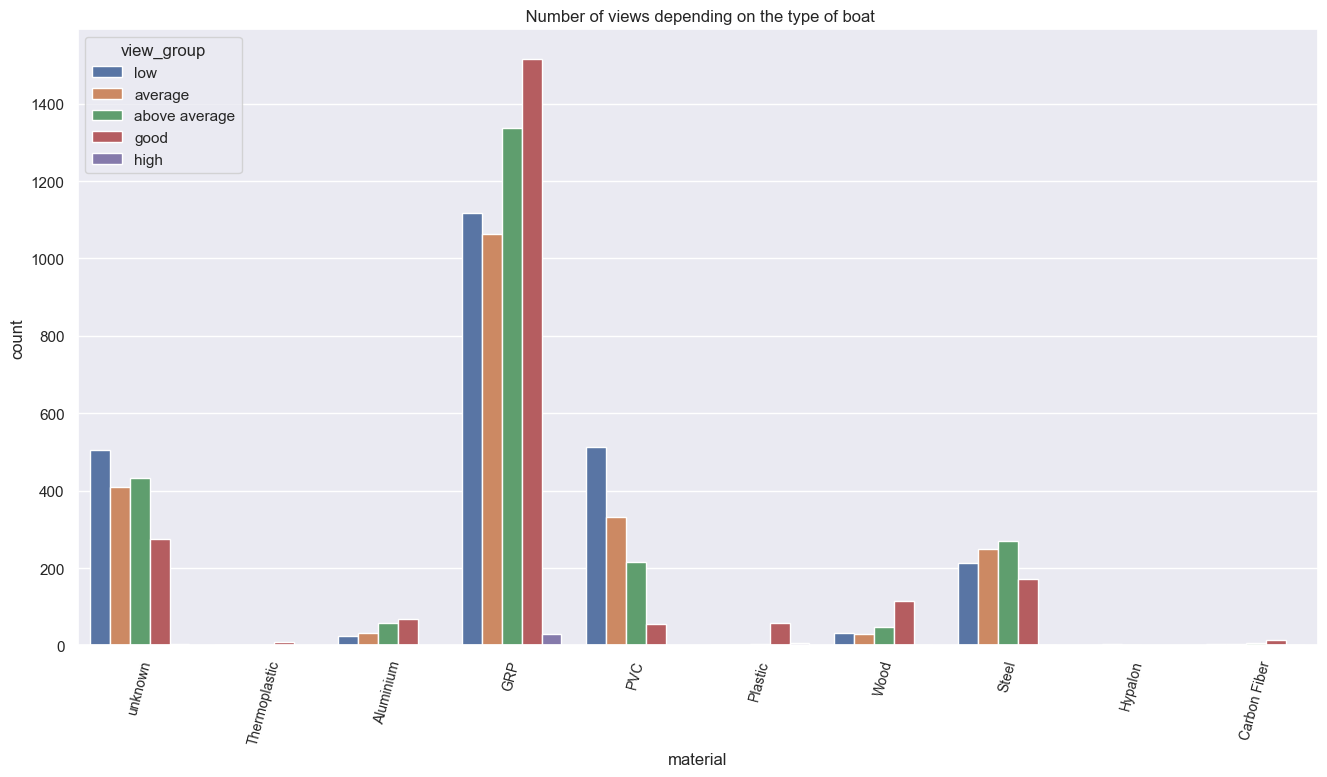

In [30]:
most_popular_material= list(df.groupby(['material']).count().sort_values('price_eur',ascending = False).index[:10])
plt.figure(figsize=(16,8))
plt.title(' Number of views depending on the type of boat', fontsize=12);
plt.xticks(rotation=75, fontsize=10); 


sns.countplot(data = df[df['material'].isin(most_popular_material)], hue = 'view_group',x = 'material');

Boats made of fiberglass are in great demand in the modern market, as fiberglass is lighter and stronger. It is easier for boat owners to repair boats.
PVC and steel are next in popularity.

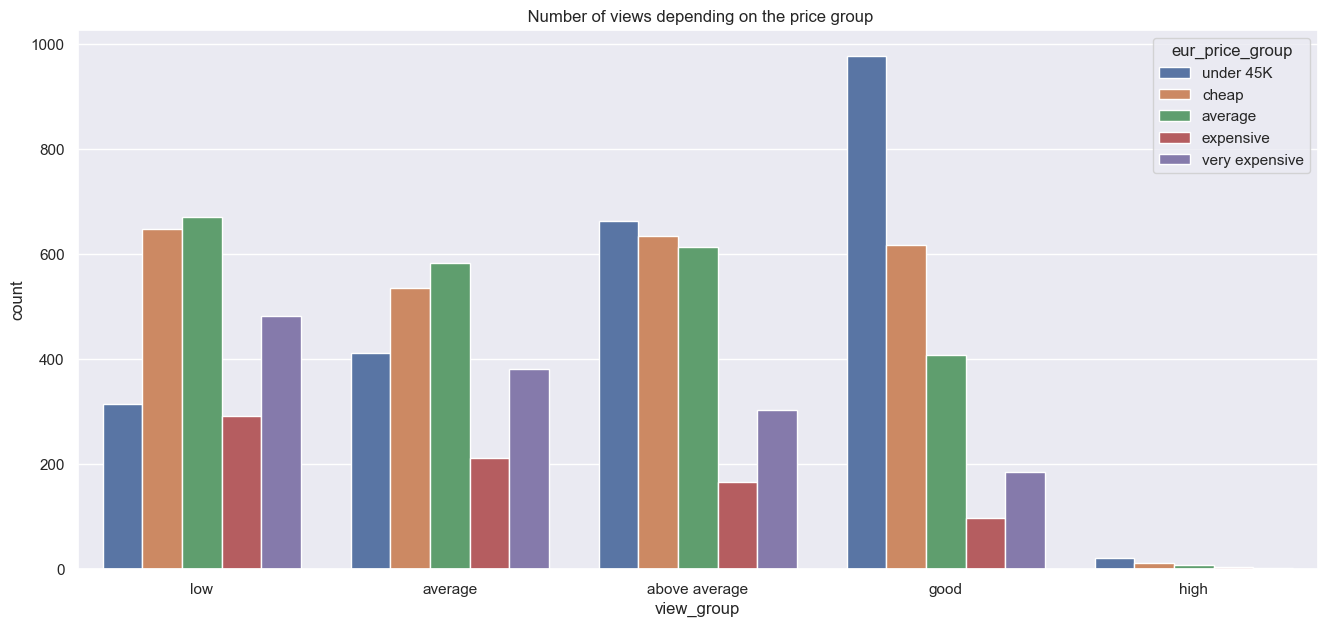

In [31]:
plt.figure(figsize=(16,7))
plt.title(' Number of views depending on the price group', fontsize=12);

sns.countplot(data = df, x = 'view_group',hue = 'eur_price_group');


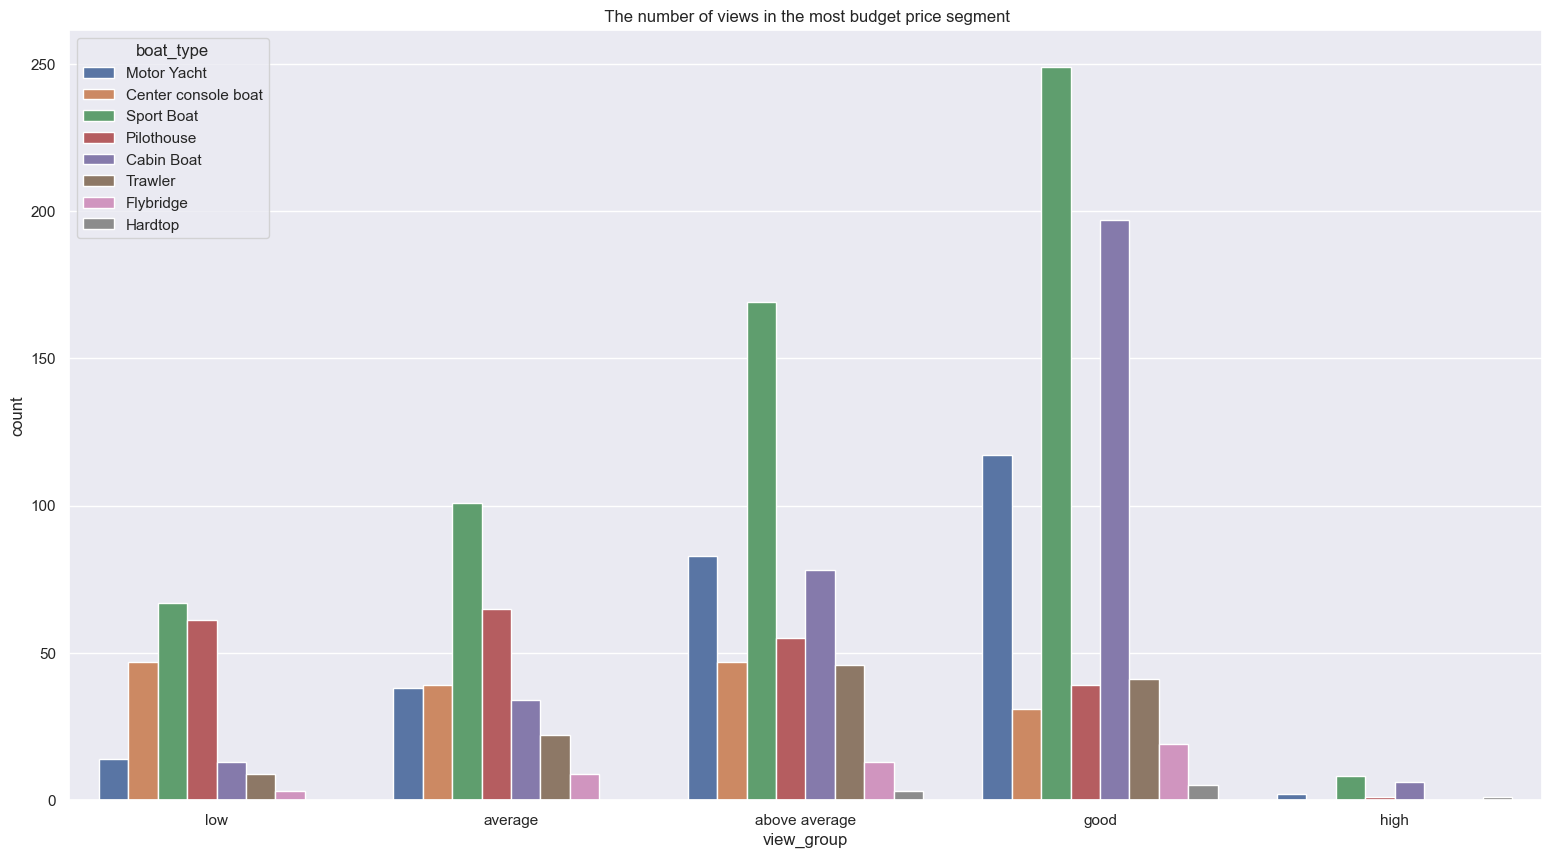

In [32]:
plt.figure(figsize=(19,10))
plt.title(' The number of views in the most budget price segment', fontsize=12);
sns.countplot(data = df[df['boat_type'].isin(most_popular_boat)].query('eur_price_group == "under 45K"'), x = 'view_group',hue = 'boat_type');


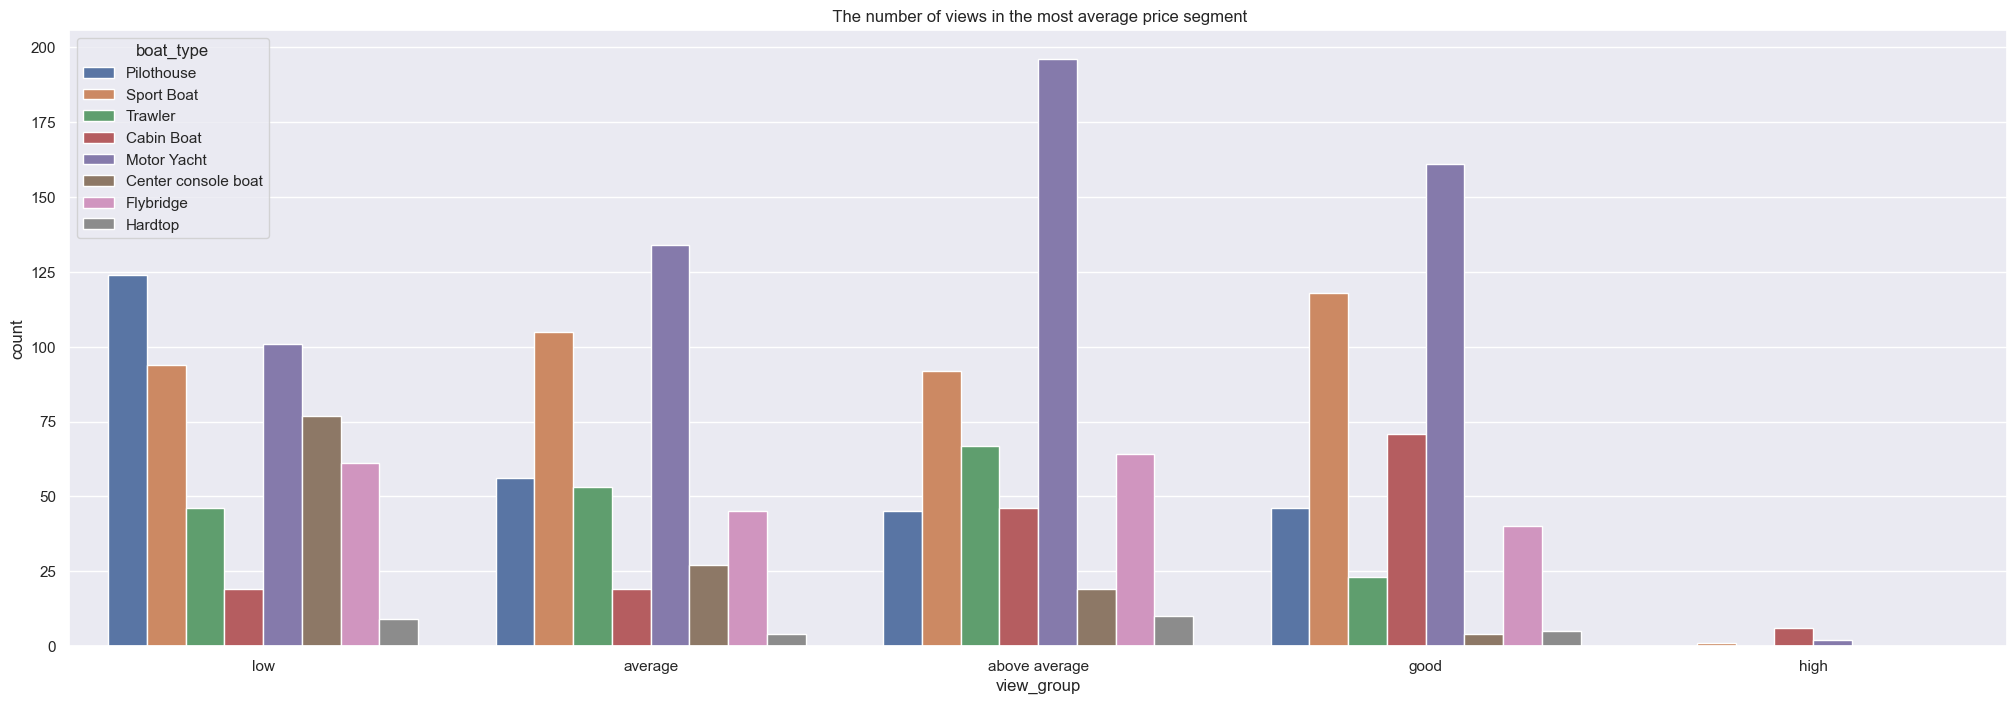

In [33]:
plt.figure(figsize=(25,8))
plt.title(' The number of views in the most average price segment', fontsize=12);
sns.countplot(data = df[df['boat_type'].isin(most_popular_boat)].query('eur_price_group == "cheap"'), x = 'view_group',hue = 'boat_type');


We see that the boats of the low price segment are of interest, they are budget (less than 45 thousand EURO) and cheap (45-100 thousand EURO).


In a group of up to 45 thousand, a sports boat is more popular than a motor yacht; in a group of 45 to 100 thousand, on the contrary, a motor yacht is more popular than a sports boat.


In [34]:
most_popular_material= list(df.groupby(['location']).count().sort_values('price_eur',ascending = False).index[:10])


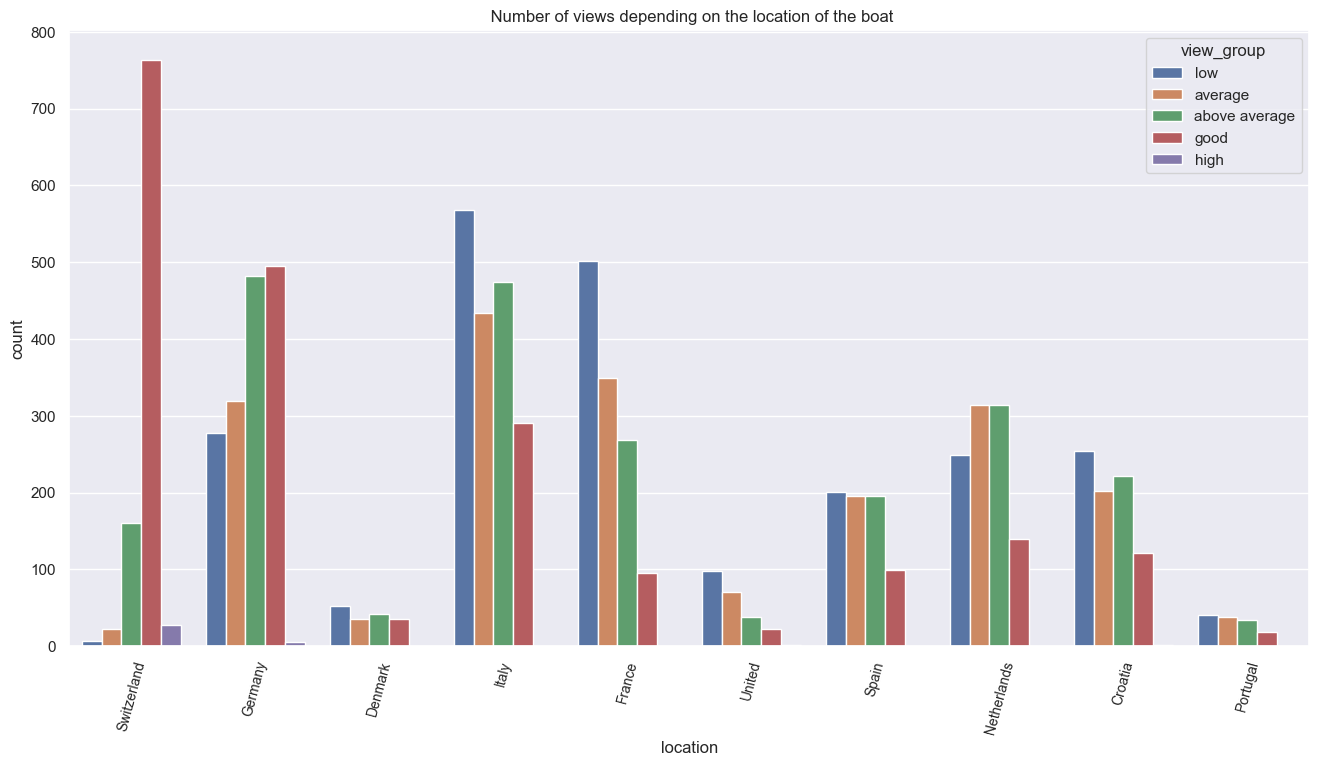

In [35]:
plt.figure(figsize=(16,8))
plt.title(' Number of views depending on the location of the boat', fontsize=12);
plt.xticks(rotation=75, fontsize=10); 


sns.countplot(data = df[df['location'].isin(most_popular_material)], hue = 'view_group',x = 'location');

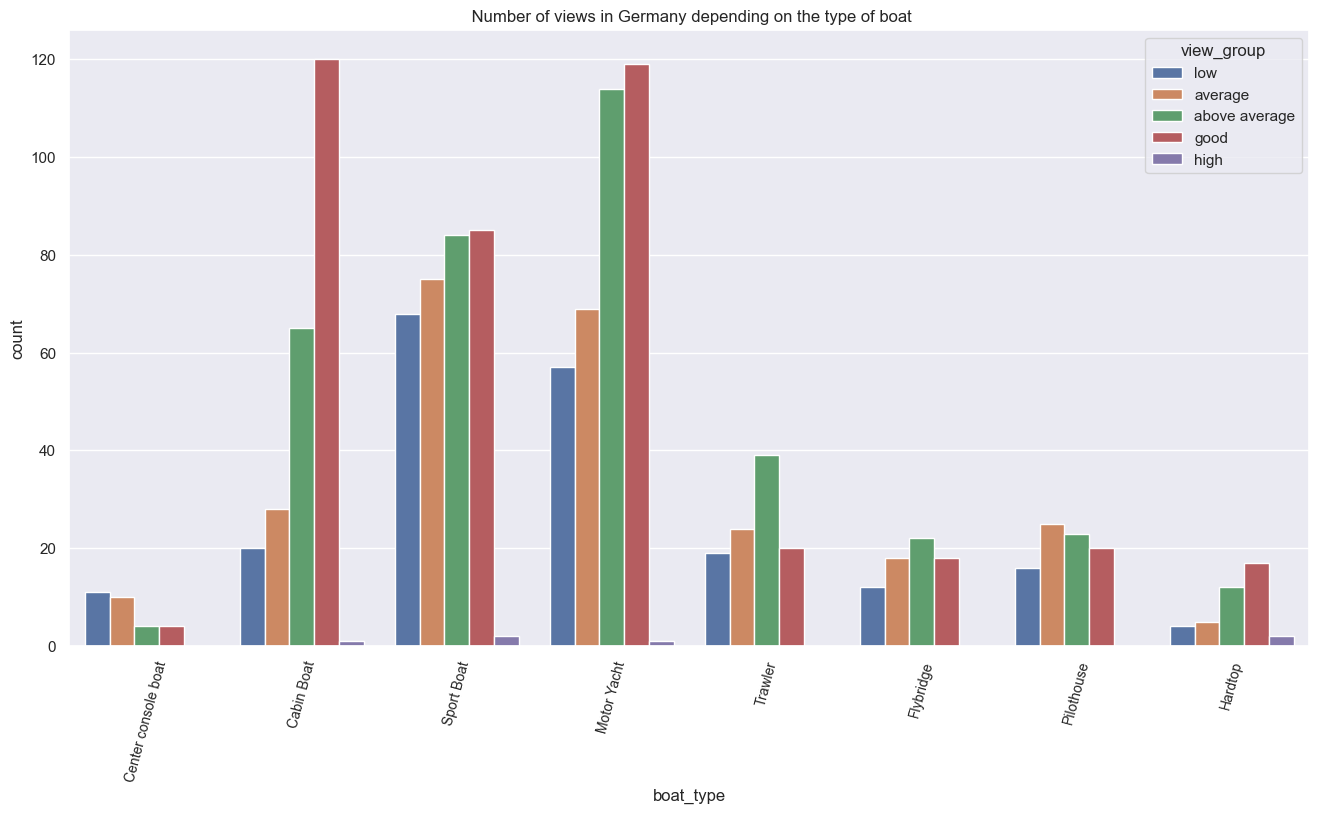

In [36]:
plt.figure(figsize=(16,8))
plt.title(' Number of views in Germany depending on the type of boat', fontsize=12);

sns.countplot(data = df[df['boat_type'].isin(most_popular_boat)].query('location == "Germany"'), hue = 'view_group',x = 'boat_type');
plt.xticks(rotation=75, fontsize=10); 


The top locations are Switzerland, Germany, and Italy. Swiss people are affordable for all kinds of boats.
Germans prefer boats worth less than 270 thousand . An Italian is inclined to consider a budget boat worth less than 50 thousand In addition, there are many lakes in Switzerland and Germany, people like to sail boats and enjoy the scenery.

Recommendations
The data shows that the key countries for boat views are Switzerland, Germany and Italy.
Let's describe the most popular search queries:
1. The popularity is higher for boats up to 5 years old, but in general, the popularity is high for boats up to 16 years old, so we can say that boats up to 16 years old have a large number of views.
2. A motor yacht, a sports boat and a boat with a flybridge of a lower price category or an average of up to 100 thousand euros made of GRP or PVC material.

If you meet these conditions, there will be more boat views and, consequently, the company's profit will also increase

In [37]:
df[df['number_of_views_last_7_days']>=500]

,price_eur,eur_price_group,boat_type,manufacturer,type,fuel,year_built,age,age_group,length,width,material,location,number_of_views_last_7_days,view_group
28,4120.0,under 45K,Fishing Boat,unknown,Used boat,Unleaded,1994,28,26-50 years,5.60,1.58,GRP,Switzerland,641,good
29,4094.0,under 45K,Fishing Boat,Terhi power boats,new boat from stock,None,2020,2,0-5 years,4.01,1.50,Thermoplastic,Switzerland,512,good
35,3914.0,under 45K,Cabin Boat,Draco power boats,Used boat,Unleaded,1980,42,26-50 years,6.20,2.45,GRP,Switzerland,1804,high
36,3914.0,under 45K,Fishing Boat,Hensa power boats,Used boat,Unleaded,1974,48,26-50 years,5.40,1.67,Plastic,Switzerland,849,good
46,6077.0,under 45K,Sport Boat,Skibsplast power boats,Used boat,None,1980,42,26-50 years,5.85,2.23,GRP,Switzerland,543,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9843,6695.0,under 45K,Sport Boat,Baha power boats,Used boat,Unleaded,1995,27,26-50 years,6.80,2.38,GRP,Thun,1831,high
9871,5408.0,under 45K,Sport Boat,Fletcher power boats,Used boat,Unleaded,1975,47,26-50 years,4.38,1.70,GRP,Switzerland,997,good
9877,5150.0,under 45K,Cabin Boat,Princess power boats,Used boat,None,1974,48,26-50 years,7.20,2.70,GRP,Switzerland,1299,high
9878,5149.0,under 45K,Sport Boat,Tullio Abbate power boats,Used boat,Unleaded,1980,42,26-50 years,6.00,2.10,GRP,Switzerland,1917,high


## Looking at the data with more than 500 views, we can say that they were distributed according to the following criteria :

1. About 250 ads were for the sale of used boats, most of which were in the low price segment of about 150 ads and about 60 of the average segment.

2. With the type of boats almost the same as in the previous conclusions, the most popular was a sports boat, then a boat with a cabin and the third type is a motor yacht and most of the announcements were in Switzerland, with popular materials also unchanged, the most popular material is GPR